In [1]:
import os
import numpy as np
import pandas as pd
from time import time

import matplotlib.pyplot as plt
import matplotlib
import wordcloud
import seaborn as sns
matplotlib.rcParams['mathtext.fontset'] = 'cm'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams["font.size"] = 26

from utils import preprocessing
from sklearn.feature_extraction import text
from sklearn import decomposition

data_dir = "/home/stavros/DATA/AirbnbReviews"
#data_dir = "D:/"

In [2]:
def text_from_reviews(cities):
    filename = lambda city: "{}_reviews_nostopwords_en_nocancel_20000samples.csv".format(city)
    
    all_reviews = []
    for city in cities:
        data = pd.read_csv(os.path.join(data_dir, city, filename(city)))
        print("Loaded {} data: {}".format(city, data.shape))
        
        all_reviews.append([])
        for review in data.normalized_comments:
            if isinstance(review, str):
                all_reviews[-1].append(review)
            else:
                print("Error with review: {}".format(review))
    
    return " ".join(review for city_reviews in all_reviews for review in city_reviews)

In [3]:
from PIL import Image
def separate_earth_and_ocean(image_file: str, ocean_color: np.ndarray = None):
    true_image = np.array(Image.open(image_file))
    # remove last channel that is full of 255 (for some reason I don't know)
    true_image = true_image[:, :, :-1]
    
    full_ocean = np.array(np.prod(true_image.shape[:2]) * [true_image[0, 0]])
    full_ocean = full_ocean.reshape(true_image.shape)

    oceanx, oceany, _ = np.where(true_image == full_ocean)
    earthx, earthy, _ = np.where(true_image != full_ocean)
        
    ocean_only = np.copy(true_image)
    ocean_only[earthx, earthy] = 255 * np.ones(true_image[earthx, earthy].shape)
    if ocean_color is not None:
        ocean_only[oceanx, oceany] = ocean_color
    
    earth_only = np.copy(true_image)
    earth_only[oceanx, oceany] = 255 * np.ones(true_image[oceanx, oceany].shape)

    return earth_only, ocean_only

In [8]:
eu_cities = {"barcelona", "berlin", "london", "rome", "paris", "vienna", "istanbul", "prague"}
usa_cities = {"nyc", "boston", "chicago", "austin", "los_angeles", "san_diego", "seattle", 
              "washington", "san_francisco"}

print("Loading EU reviews:")
eu_text = text_from_reviews(eu_cities)
print("\nLoading USA reviews:")
usa_text = text_from_reviews(usa_cities)

print("\nTotal EU text:", len(eu_text))
print("Total USA text:", len(usa_text))

Loading EU reviews:
Loaded london data: (20000, 7)
Error with review: nan
Loaded paris data: (20000, 7)
Loaded rome data: (20000, 7)
Loaded barcelona data: (20001, 7)
Error with review: nan
Error with review: nan
Loaded berlin data: (20000, 7)

Loading USA reviews:
Loaded san_diego data: (20000, 7)
Loaded boston data: (20000, 7)
Error with review: nan
Loaded chicago data: (20000, 7)
Error with review: nan
Loaded los_angeles data: (20000, 7)
Loaded nyc data: (20000, 7)
Loaded austin data: (20000, 7)

Total EU text: 22863845
Total USA text: 25300179


In [5]:
usa_earth, usa_ocean = separate_earth_and_ocean(os.path.join(data_dir, "usa_clean.png"))
ocean_color = usa_ocean[0, 0]
europe_earth, europe_ocean = separate_earth_and_ocean(os.path.join(data_dir, "europe_clean.png"), 
                                                      ocean_color=ocean_color)

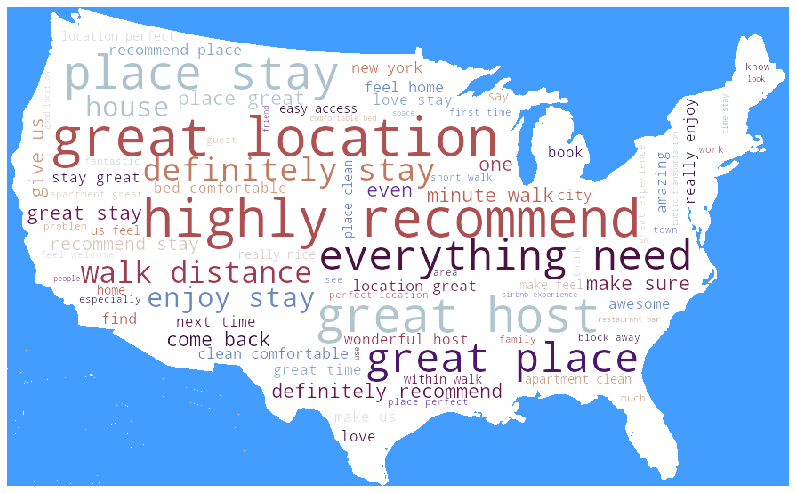

In [6]:
usa_wc = wordcloud.WordCloud(background_color="rgba(255, 255, 255, 0)", mode="RGBA",
                             colormap="twilight",
                             max_words=80, 
                             max_font_size=60, 
                             mask=usa_earth,
                             random_state=42).generate(usa_text)

plt.figure(figsize=(14, 10))
plt.imshow(usa_ocean)
plt.imshow(usa_wc)
plt.axis("off")
plt.show()

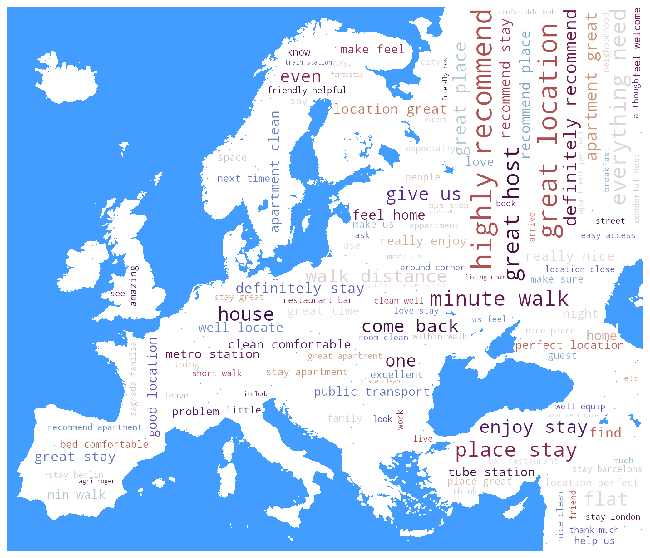

In [7]:
eu_wc = wordcloud.WordCloud(background_color="rgba(255, 255, 255, 0)", mode="RGBA",
                             colormap="twilight",
                             max_words=120, 
                             max_font_size=60, 
                             mask=europe_earth,
                             random_state=42).generate(eu_text)

plt.figure(figsize=(14, 10))
plt.imshow(europe_ocean)
plt.imshow(eu_wc)
plt.axis("off")
plt.show()